In [1]:
import os
import tweepy as tw
import pandas as pd

In [6]:
consumer_key= 'ad4iUtAtOPNw6BqLsmXijBmRO'
consumer_secret= 'pRTbk96BqDqHHY6n7BniONsew7vptjPC64CuG4YDeVjZMFvwKp'
access_token= '790465310667137025-fWNRNmVIGZ0BQMWdnKA87I23EvK9qkt'
access_token_secret= 'BTn8oFogOscPWqhN6hbEZSxxQ0ugPiwnNYPiLZvCW0LPT'

In [7]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [12]:
search_words = "#covid19"
new_search = search_words + " -filter:retweets"
date_since = "2018-11-16"

In [17]:
tweets = tw.Cursor(api.search,
                   q=new_search,
                   tweet_mode = 'extended',
                   lang="en",
                   since='2018-04-23').items(10000)

all_tweets = [tweet.full_text for tweet in tweets]
all_tweets[:10]

['#COVID19 death toll breaches 900-mark in #Odisha https://t.co/bQSRuc96Zb',
 'as per this data by @MoHFW_INDIA \n#Kerala is at the bottom in recovery rate, and top in active cases (%) . Good thing is the death rate is also the lowest. State reported 3rd most cases yesterday behind #Maharashtra &amp; #Karnataka.\n#covid #COVID19 #CoronaVirusUpdates https://t.co/kRCGufsyqi https://t.co/Nxy3C5DDe5',
 'Not anymore..\n\n#COVID19 #lockdown #Ontario #DougFord https://t.co/CIhwJT3tYt',
 'White House Aids release photos of President #Trump working while being treated for #Covid19 \n#CovidCaughtTrump https://t.co/5qML0qc3YY',
 '@GovMikeDeWine @LtGovHusted Where is the “Prayer Day” for all 209,000+ #COVID19 \nDEAD AMERICANS ???',
 'No need to wait for a #vaccine against #covid19, as governments and media claim is desperately needed.\n\n88 international studies, 51 of which peer reviewed, show positive #hydroxychloroquine treatment outcomes!\n\nhttps://t.co/xzrlhZ8nsn',
 'The #COVIDー19 virus will

In [18]:
len(all_tweets)

6648

In [1]:
import re
def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)
def deURLify(text):
    text=re.sub(r'http\S+', '', text)
    return text
def deEscapeStatements(text):
    text = text.replace('\n', ' ').replace('\r', '')
    return text
def asciiencoding(text):
    encoded_string = text.encode("ascii", "ignore")
    decode_string = encoded_string.decode()
    return decode_string
#Removing all escape sequences, all emojis, all URLs and all non-ascii text from tweets:
for i in range(len(all_tweets)):
    all_tweets[i] = deEmojify(deURLify(deEscapeStatements(asciiencoding(all_tweets[i]))))

In [60]:
tweet_df = pd.DataFrame(all_tweets)

In [52]:
tweet_df.head()

,0
0,#COVID19 death toll breaches 900-mark in #Odisha
1,as per this data by @MoHFW_INDIA #Kerala is a...
2,Not anymore.. #COVID19 #lockdown #Ontario #Do...
3,White House Aids release photos of President #...
4,@GovMikeDeWine @LtGovHusted Where is the Praye...


In [54]:
tweet_df.to_excel("minedcovidtweets.xlsx",
             sheet_name='Sheet 1')

In [55]:
tweet_df

,0
0,#COVID19 death toll breaches 900-mark in #Odisha
1,as per this data by @MoHFW_INDIA #Kerala is a...
2,Not anymore.. #COVID19 #lockdown #Ontario #Do...
3,White House Aids release photos of President #...
4,@GovMikeDeWine @LtGovHusted Where is the Praye...
5,No need to wait for a #vaccine against #covid1...
6,The #COVID19 virus will not go away. With 54k ...
7,15 more succumb to #COVID19 in #Odisha; toll b...
8,right now Picture from Facebook #SriLank...
9,Rinse and repeat. #COVID19 #Event201 #CladeX


In [58]:
import os
import matplotlib.pyplot as plt
tweet_df.columns

RangeIndex(start=0, stop=1, step=1)

In [61]:
for i in range(len(tweet_df[0])):
    tweet_df[0][i] = tweet_df[0][i].strip()
tweet_df.head()

,0
0,#COVID19 death toll breaches 900-mark in #Odisha
1,as per this data by @MoHFW_INDIA #Kerala is a...
2,Not anymore.. #COVID19 #lockdown #Ontario #Do...
3,White House Aids release photos of President #...
4,@GovMikeDeWine @LtGovHusted Where is the Praye...


In [62]:
import re
#Remove punctuation
tweet_df[0] = tweet_df[0].map(lambda x: re.sub('[,/.!?#:()@]', '', x))

#Convert the titles to lowercase
tweet_df[0] = tweet_df[0].map(lambda x: x.lower())

#print out the first rows of papers
tweet_df[0].head(50)

0        covid19 death toll breaches 900-mark in odisha
1     as per this data by mohfw_india  kerala is at ...
2        not anymore  covid19 lockdown ontario dougford
3     white house aids release photos of president t...
4     govmikedewine ltgovhusted where is the prayer ...
5     no need to wait for a vaccine against covid19 ...
6     the covid19 virus will not go away with 54k ne...
7     15 more succumb to covid19 in odisha; toll bre...
8     right now    picture from facebook   srilanka ...
9           rinse and repeat   covid19 event201  cladex
10    loveisnottourism loveisessential covid19 trave...
11    deputy director of narcotics control bureau kp...
12    covid19 'majority' of uk firms now looking to ...
13    all are concerned about their future  we are a...
14    when a country have a govt who are full of cov...
15    did covid-19 positive donald trump continue me...
16    so basically one man in the entire world ate o...
17    briantylercohen wrbethesda msbc joyannreid

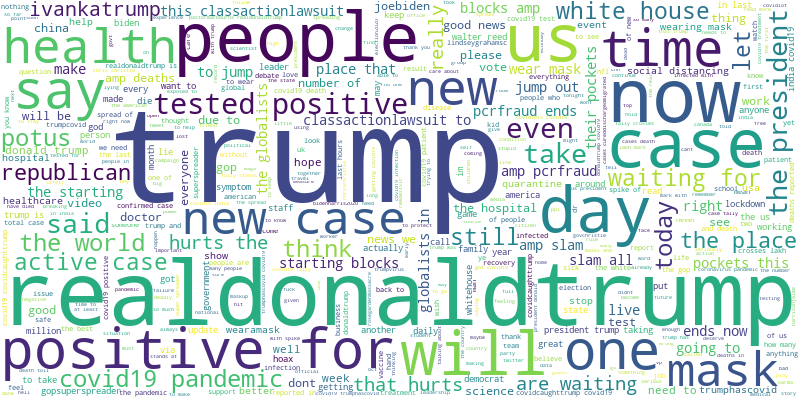

In [66]:
from wordcloud import WordCloud, STOPWORDS

#Join the different processed titles together
long_string = ','.join(list(tweet_df[0].values))
stopwords = set(STOPWORDS)
stopwords.add("https")
stopwords.add("covid19")
stopwords.add("corona")
stopwords.add("coronavirus")
stopwords.add("virus")
stopwords.add("cases")
stopwords.add("covid")
stopwords.add("ha")
stopwords.add("wa")
stopwords.add("amp")
stopwords.add("&")
stopwords.add("hi")
#stopwords.add("Demonetization co")
#Narendra Modi is the Prime minister of India
#stopwords.add("lakh")
#Create a WordCloud object
wc = WordCloud(background_color = "white", width=800, height=400, stopwords=stopwords, max_words = 1000, contour_width = 3, contour_color='steelblue')

#Generate a word cloud
wc.generate(long_string)

#Visualize the word cloud
wc.to_image()

In [ ]:
#Remember, twitter audience is given by:
'''
US: 62.55 millions
Japan: 49.1 millions
India: 17 millions
Brazil: 15.7 millions
'''

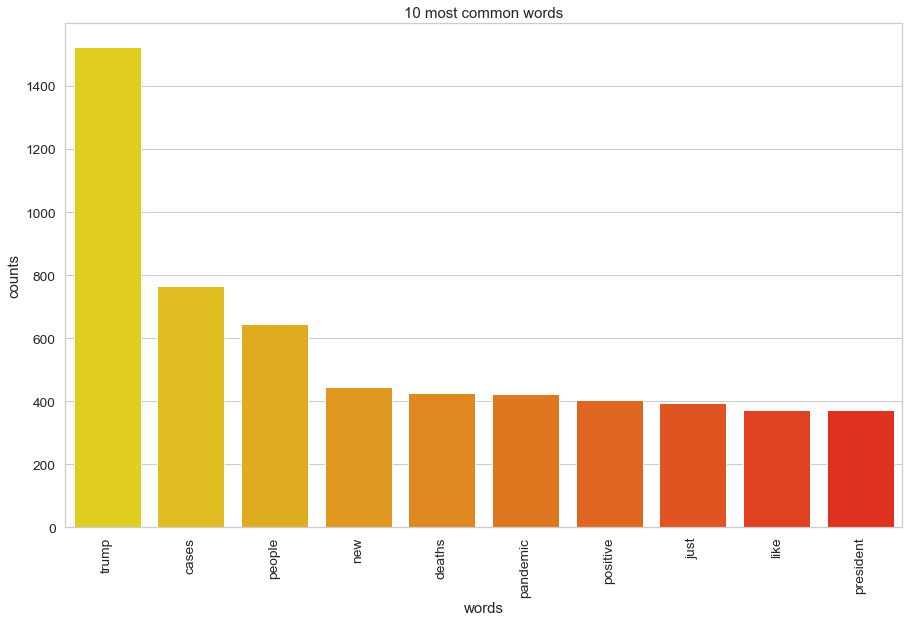

In [72]:
#Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

for i in range(len(tweet_df[0])):
    #temp_list = []
    #temp_list = tweet_df[0][i].split()
    tweet_df[0][i] = re.sub('&amp', '', tweet_df[0][i])
    tweet_df[0][i] = re.sub('amp', '', tweet_df[0][i])
    tweet_df[0][i] = re.sub('covid19', '', tweet_df[0][i])
    tweet_df[0][i] = re.sub('coronavirus', '', tweet_df[0][i])
    tweet_df[0][i] = re.sub('covid', '', tweet_df[0][i])
    tweet_df[0][i] = re.sub('corona', '', tweet_df[0][i])
    tweet_df[0][i] = re.sub('virus', '', tweet_df[0][i])
    tweet_df[0][i] = re.sub('19', '', tweet_df[0][i])
    tweet_df[0][i] = re.sub('realdonaldtrump', '', tweet_df[0][i])
    tweet_df[0][i] = re.sub('trumphas', '', tweet_df[0][i])
    #papers['text'][i] = re.sub('demonetization', '', papers['text'][i])
    #print("LEN: ", len(temp_list)) ##
    #for element in temp_list:
        #if ('0' in element) or ('1' in element) or ('2' in element) or ('3' in element) or ('4' in element) or ('5' in element) or ('6' in element) or ('7' in element) or ('8' in element) or ('9' in element):
            #del temp_list[temp_list.index(element)]
    #papers['text'][i] = ' '.join(temp_list) #rejoining


#helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse = True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words))
    
    plt.figure(2, figsize = (15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='autumn_r')
    plt.xticks(x_pos, words, rotation=90)
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
    
#Initialize the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words = 'english')

#Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(tweet_df[0])

#Visualize the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

In [73]:
#Now we tweak a number of topic parameters
import warnings
warnings.simplefilter("ignore", DeprecationWarning)

#Load the LDA model from sklearn
from sklearn.decomposition import LatentDirichletAllocation as LDA

#Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #{}:".format(topic_idx))
        print(" ".join([words[i] for i in topic.argsort()[:-n_top_words -1:-1]]))

#Tweak the two parameters below (use int values below 15)
number_topics = 5
number_words = 10

#Create and fit the LDA model
lda = LDA(n_components=number_topics)
lda.fit(count_data)

#Print the topics found by the LDA model
print("Topics found via LDA: ")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA: 

Topic #0:
cases trump deaths new positive total india active hospital pandemic

Topic #1:
trump people mask just like president americans masks caughttrump gop

Topic #2:
pandemic health people world day like time positive test trump

Topic #3:
testing know test pandemic china positive days nfl tests world

Topic #4:
trump news place good starting waiting hurts ends jump pockets


In [75]:
%%time

from pyLDAvis import sklearn as sklearn_lda
import pickle 
import pyLDAvis

# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join(r'C:\Users\KIIT\AppData\Local\Programs\Python\Python36\Scripts\ldavis_prepared_'+str(number_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:

    LDAvis_prepared = sklearn_lda.prepare(lda, count_data, count_vectorizer)

    #with open(LDAvis_data_filepath, 'wb') as f:
        #pickle.dump(LDAvis_prepared, f)
        
# load the pre-prepared pyLDAvis data from disk
#with open(LDAvis_data_filepath) as f:
    #LDAvis_prepared = pickle.load(f, encoding='utf-8')

pyLDAvis.save_html(LDAvis_prepared, r'C:\Users\KIIT\AppData\Local\Programs\Python\Python36\Scripts\ldavis_prepared_covidmined.html')

LDAvis_prepared

C:\Users\KIIT\AppData\Roaming\Python\Python36\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


Wall time: 11min 24s


In [74]:
#big sentiments

In [2]:
import pandas as pd
import os
os.chdir(r'C:\Users\KIIT\AppData\Local\Programs\Python\Python36\Scripts\Sentiment datasets')
papers = pd.read_csv('big_sentiments.csv')
papers.head()

,Text_Id,Text,Date,Location,Sentiments
0,1241032866567356417,RT @theskindoctor13: Shaheen Bagh is still on....,Fri Mar 20 16:04:27 +0000 2020,"Uttar Pradesh, India",0.000
1,1241032867699765249,RT @theskindoctor13: Shaheen Bagh is still on....,Fri Mar 20 16:04:27 +0000 2020,Mumbai,0.000
2,1241032875102703616,"RT @SmokingSkills_: Daughter of an IAS, son of...",Fri Mar 20 16:04:29 +0000 2020,"Jodhpur, India",0.350
3,1241032877099237379,RT @narendramodi: The young actors have someth...,Fri Mar 20 16:04:29 +0000 2020,"Gurugram, Bharat",0.125
4,1241032870405128192,RT @theskindoctor13: Shaheen Bagh is still on....,Fri Mar 20 16:04:28 +0000 2020,"New Delhi, India",0.000


In [3]:
#Removing meta columns
papers = papers.drop(columns = ['Text_Id', 'Date', 'Date', 'Location', 'Sentiments'], axis=1)
#Print out the first rows of papers
papers['Text']

0         RT @theskindoctor13: Shaheen Bagh is still on....
1         RT @theskindoctor13: Shaheen Bagh is still on....
2         RT @SmokingSkills_: Daughter of an IAS, son of...
3         RT @narendramodi: The young actors have someth...
4         RT @theskindoctor13: Shaheen Bagh is still on....
5         RT @narendramodi: Explosive batsmen who've see...
6         RT @gkd600: No more spreading Rumors. This is ...
7         RT @bainjal: That son of a top official in Wes...
8         RT @amitandon: Corona has proven that India's ...
9         RT @Dt_Ritika: Being a cancer patient i am sca...
10        @GHMCOnline @CPHydCity @MinisterKTR @Eatala_Ra...
11        RT @amitandon: Corona has proven that India's ...
12        RT @alok_bhatt: One person sent to quarantine ...
13        RT @amitandon: Corona has proven that India's ...
14        RT @TheOceanVibes: All those corona jokes are ...
15        "Delhi government will pay salaries to all con...
16        RT @amitandon: Corona has prov

In [5]:
for i in range(len(papers['Text'])):
    papers['Text'][i] = deEmojify(deURLify(deEscapeStatements(asciiencoding(papers['Text'][i]))))
papers['Text']

0         RT @theskindoctor13: Shaheen Bagh is still on....
1         RT @theskindoctor13: Shaheen Bagh is still on....
2         RT @SmokingSkills_: Daughter of an IAS, son of...
3         RT @narendramodi: The young actors have someth...
4         RT @theskindoctor13: Shaheen Bagh is still on....
5         RT @narendramodi: Explosive batsmen who've see...
6         RT @gkd600: No more spreading Rumors. This is ...
7         RT @bainjal: That son of a top official in Wes...
8         RT @amitandon: Corona has proven that India's ...
9         RT @Dt_Ritika: Being a cancer patient i am sca...
10        @GHMCOnline @CPHydCity @MinisterKTR @Eatala_Ra...
11        RT @amitandon: Corona has proven that India's ...
12        RT @alok_bhatt: One person sent to quarantine ...
13        RT @amitandon: Corona has proven that India's ...
14        RT @TheOceanVibes: All those corona jokes are ...
15        "Delhi government will pay salaries to all con...
16        RT @amitandon: Corona has prov

In [6]:

import re
#Remove punctuation
papers['Text'] = papers['Text'].map(lambda x: re.sub('[,/.!?@&#:]', '', x))

#Convert the titles to lowercase
papers['Text'] = papers['Text'].map(lambda x: x.lower())

#print out the first rows of papers
papers['Text'].head(20)

0     rt theskindoctor13 shaheen bagh is still on  m...
1     rt theskindoctor13 shaheen bagh is still on  m...
2     rt smokingskills_ daughter of an ias son of a ...
3     rt narendramodi the young actors have somethin...
4     rt theskindoctor13 shaheen bagh is still on  m...
5     rt narendramodi explosive batsmen who've seen ...
6     rt gkd600 no more spreading rumors this is the...
7     rt bainjal that son of a top official in west ...
8     rt amitandon corona has proven that india's  b...
9     rt dt_ritika being a cancer patient i am scare...
10    ghmconline cphydcity ministerktr eatala_rajend...
11    rt amitandon corona has proven that india's  b...
12    rt alok_bhatt one person sent to quarantine tr...
13    rt amitandon corona has proven that india's  b...
14    rt theoceanvibes all those corona jokes are ok...
15    "delhi government will pay salaries to all con...
16    rt amitandon corona has proven that india's  b...
17    rt amitandon corona has proven that india'

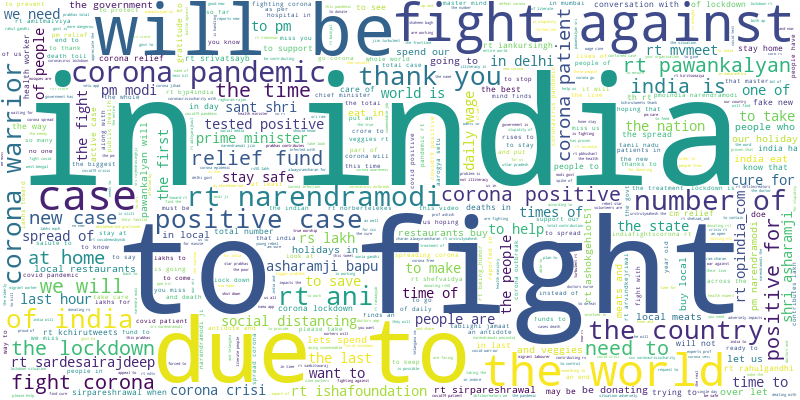

In [7]:
from wordcloud import WordCloud, STOPWORDS

#Join the different processed titles together
long_string = ','.join(list(papers['Text'].values))
stopwords = set(STOPWORDS)
stopwords.add("https")
stopwords.add("covid19")
stopwords.add("corona")
stopwords.add("coronavirus")
stopwords.add("virus")
stopwords.add("cases")
stopwords.add("covid")
stopwords.add("ha")
stopwords.add("wa")
stopwords.add("amp")
stopwords.add("&")
stopwords.add("rt")
stopwords.add("viru")
stopwords.add("coronaviru")
stopwords.add("thi")

#Narendra Modi is the Prime minister of India
#stopwords.add("lakh")
#Create a WordCloud object
wc = WordCloud(background_color = "white", width=800, height=400, stopwords=stopwords, max_words = 1000, contour_width = 3, contour_color='steelblue')

#Generate a word cloud
wc.generate(long_string)

#Visualize the word cloud
wc.to_image()

In [35]:
for i in range(len(papers['Text'])):
    a = papers['Text'][i].split('  ')
    a = list(map(lambda x: re.sub(' ', '', x), a))
    a[:] = [x for x in a if x!='']
    a_s = ' '.join(a)
    papers['Text'][i] = a_s


In [ ]:
#Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

for i in range(len(papers['Text'])):
    temp_list = papers['Text'][i]
    #temp_list = papers['Text'][i].split()
    temp_list = re.sub(' &amp ', ' ', temp_list)
    temp_list = re.sub('amp ', ' ', temp_list)
    temp_list = re.sub(' covid19 ', ' ', temp_list)
    temp_list = re.sub(' coronavirus ', ' ', temp_list)
    temp_list = re.sub(' covid ', ' ', temp_list)
    temp_list = re.sub(' corona ', ' ', temp_list)
    temp_list = re.sub(' virus ', ' ', temp_list)
    temp_list = re.sub(' rt ', ' ', temp_list)
    temp_list = re.sub(' thi ', ' ', temp_list)
    temp_list = re.sub(' wa ', ' ', temp_list)
    temp_list = re.sub(' & ', ' ', temp_list)
    temp_list = re.sub(' viru ', ' ', temp_list)
    temp_list = re.sub(' coronaviru ', ' ', temp_list)
    temp_list = re.sub('"', '', temp_list)
    temp_list = re.sub("'", '', temp_list)
    #papers['Text'][i] = re.sub('demonetization', '', papers['text'][i])
    #print("LEN: ", len(temp_list)) ##
    #for element in temp_list:
        #if ('0' in element) or ('1' in element) or ('2' in element) or ('3' in element) or ('4' in element) or ('5' in element) or ('6' in element) or ('7' in element) or ('8' in element) or ('9' in element):
            #del temp_list[temp_list.index(element)]
    papers['Text'][i] = temp_list #rejoining


#helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse = True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words))
    
    plt.figure(2, figsize = (15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='autumn_r')
    plt.xticks(x_pos, words, rotation=90)
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
    
#Initialize the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words = 'english')

#Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(papers['Text'])

#Visualize the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

In [ ]:
#Now we tweak a number of topic parameters
import warnings
warnings.simplefilter("ignore", DeprecationWarning)

#Load the LDA model from sklearn
from sklearn.decomposition import LatentDirichletAllocation as LDA

#Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #{}:".format(topic_idx))
        print(" ".join([words[i] for i in topic.argsort()[:-n_top_words -1:-1]]))

#Tweak the two parameters below (use int values below 15)
number_topics = 5
number_words = 10

#Create and fit the LDA model
lda = LDA(n_components=number_topics)
lda.fit(count_data)

#Print the topics found by the LDA model
print("Topics found via LDA: ")
print_topics(lda, count_vectorizer, number_words)